# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

# 1. Problem statement

In [2]:
# 2.Read the data

In [6]:
df_train = pd.read_csv("C:/Users/Aadarsh/OneDrive/Desktop/ETLHive/NOTE'S/ML/Superised ML/Regrassion/A Regrassion Project/training_set.csv")
df_test = pd.read_csv("C:/Users/Aadarsh/OneDrive/Desktop/ETLHive/NOTE'S/ML/Superised ML/Regrassion/A Regrassion Project/testing_set.csv")

df = df_train.append(df_test,sort=False)

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


# 3.Exploratory data analysis

# 3.1 Handling missing values

In [9]:
df = df.dropna(axis=1, how='any', thresh = 1000)
df = df.fillna(df.mean()) #Replace NULL values with mean values
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.00000
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.00000
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.00000
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.00000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,180921.19589
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,180921.19589
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,180921.19589
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,180921.19589


# 3.2 Encoding

In [10]:
df = pd.get_dummies(df)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


# 3.3 Checking the correlation

In [11]:
df.corr()["SalePrice"].sort_values()

ExterQual_TA       -0.415632
KitchenQual_TA     -0.367344
BsmtQual_TA        -0.320321
GarageFinish_Unf   -0.289709
MasVnrType_None    -0.265352
                      ...   
GarageArea          0.437654
GarageCars          0.444406
GrLivArea           0.520311
OverallQual         0.548617
SalePrice           1.000000
Name: SalePrice, Length: 277, dtype: float64

# Linearity(Correlation of features with output)

In [12]:
#Drop features that are not correlated with output
nonCorrelatedWithOutput = [column for column in df if abs(df[column].corr(df["SalePrice"])) < 0.05]
df = df.drop(nonCorrelatedWithOutput, axis=1)
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,...,1,0,0,1,0,0,1,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,...,1,0,0,1,0,0,1,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,...,1,0,0,1,0,0,1,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,...,1,0,0,1,0,0,1,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,...,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,1,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,...,1,0,0,1,0,0,1,1,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,1,0,0,1,0,0,1,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,...,0,0,0,1,0,0,1,0,1,0


# No multicolinearity(Correlation of features with each other)

In [13]:
# #Drop features that are correlated to each other
# covarianceMatrix = df.corr()
# listOfFeatures = [i for i in covarianceMatrix]
# setOfDroppedFeatures = set() 
# for i in range(len(listOfFeatures)) :
#     for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
#         feature1=listOfFeatures[i]
#         feature2=listOfFeatures[j]
#         if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
#             setOfDroppedFeatures.add(feature1) #Add one of them to the set

# df = df.drop(setOfDroppedFeatures, axis=1)
# df

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df1 = df.drop('SalePrice',axis=1)
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif

,Features,VIF
0,MSSubClass,11.118284
1,LotFrontage,2.238264
2,LotArea,1.675424
3,OverallQual,4.742524
4,OverallCond,2.197045
...,...,...
149,SaleType_New,41.695727
150,SaleType_WD,5.668537
151,SaleCondition_Abnorml,3.533313
152,SaleCondition_Normal,6.066194


In [15]:
featurestodrop = vif.loc[vif['VIF']>10]
droplist = featurestodrop['Features']
droplist = list(droplist)
len(droplist)
print(droplist)

['MSSubClass', 'YearBuilt', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'BldgType_1Fam', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MasVnrType_BrkFace', 'MasVnrType_None', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd', 'Gar

In [16]:
df = df.drop(droplist,axis=1,)
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Fa,GarageCond_Fa,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,65.0,8450,7,5,2003,196.0,1.0,2,1,3,...,0,0,0,0,0,0,0,1,0,1
1,80.0,9600,6,8,1976,0.0,0.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
2,68.0,11250,7,5,2002,162.0,1.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
3,60.0,9550,7,5,1970,0.0,1.0,1,0,3,...,0,0,0,0,0,0,0,1,1,0
4,84.0,14260,8,5,2000,350.0,1.0,2,1,4,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,0.0,0.0,1,1,3,...,0,0,0,0,0,0,0,1,0,1
1455,21.0,1894,4,5,1970,0.0,0.0,1,1,3,...,0,0,0,1,0,0,0,1,1,0
1456,160.0,20000,5,7,1996,0.0,1.0,1,0,4,...,0,1,0,0,0,0,0,1,1,0
1457,62.0,10441,5,5,1992,0.0,0.0,1,0,3,...,0,0,0,0,0,0,0,1,0,1


# 3.4 Remove the outliers

<AxesSubplot:>

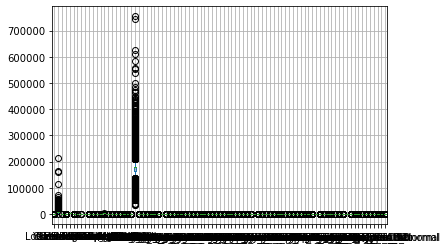

In [18]:
df.boxplot()

In [21]:
newTrain = df.iloc[:1460]
newTest = df.iloc[1460:]

def outliersusingiqr(ys):
    q1, q3 = np.percentile(ys, [25, 75]) #Get 1st and 3rd quartiles (25% -> 75% of data will be kept)
    iqr = q3 - q1
    upper_tail = q3 + 1.5*iqr
    lower_tail = q1 - 1.5*iqr 
    
    return np.where((ys > upper_tail) | (ys < lower_tail)) #Get outlier values
trainWithoutOutliers = newTrain

for column in newTrain:
    outlierValuesList = np.ndarray.tolist(outliersusingiqr(newTrain[column])[0])
    trainWithoutOutliers = newTrain.drop(outlierValuesList)
trainWithoutOutliers


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Fa,GarageCond_Fa,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,65.0,8450,7,5,2003,196.0,1.0,2,1,3,...,0,0,0,0,0,0,0,1,0,1
1,80.0,9600,6,8,1976,0.0,0.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
2,68.0,11250,7,5,2002,162.0,1.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
4,84.0,14260,8,5,2000,350.0,1.0,2,1,4,...,0,1,0,0,0,0,0,1,0,1
5,85.0,14115,5,5,1995,0.0,1.0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,2000,0.0,0.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
1456,85.0,13175,6,6,1988,119.0,1.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
1457,66.0,9042,7,9,2006,0.0,0.0,2,0,4,...,0,0,0,0,0,0,0,1,0,1
1458,68.0,9717,5,6,1996,0.0,1.0,1,0,2,...,0,0,0,0,0,0,0,1,0,1


In [22]:
df = trainWithoutOutliers
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Fa,GarageCond_Fa,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,65.0,8450,7,5,2003,196.0,1.0,2,1,3,...,0,0,0,0,0,0,0,1,0,1
1,80.0,9600,6,8,1976,0.0,0.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
2,68.0,11250,7,5,2002,162.0,1.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
4,84.0,14260,8,5,2000,350.0,1.0,2,1,4,...,0,1,0,0,0,0,0,1,0,1
5,85.0,14115,5,5,1995,0.0,1.0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,2000,0.0,0.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
1456,85.0,13175,6,6,1988,119.0,1.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
1457,66.0,9042,7,9,2006,0.0,0.0,2,0,4,...,0,0,0,0,0,0,0,1,0,1
1458,68.0,9717,5,6,1996,0.0,1.0,1,0,2,...,0,0,0,0,0,0,0,1,0,1


# 4. Train test split

In [23]:
x = df.drop('SalePrice',axis =1)
y = df['SalePrice']
x

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,...,FireplaceQu_Po,FireplaceQu_TA,GarageType_BuiltIn,GarageType_CarPort,GarageQual_Fa,GarageCond_Fa,SaleType_COD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal
0,65.0,8450,7,5,2003,196.0,1.0,2,1,3,...,0,0,0,0,0,0,0,1,0,1
1,80.0,9600,6,8,1976,0.0,0.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
2,68.0,11250,7,5,2002,162.0,1.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
4,84.0,14260,8,5,2000,350.0,1.0,2,1,4,...,0,1,0,0,0,0,0,1,0,1
5,85.0,14115,5,5,1995,0.0,1.0,1,1,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,2000,0.0,0.0,2,1,3,...,0,1,0,0,0,0,0,1,0,1
1456,85.0,13175,6,6,1988,119.0,1.0,2,0,3,...,0,1,0,0,0,0,0,1,0,1
1457,66.0,9042,7,9,2006,0.0,0.0,2,0,4,...,0,0,0,0,0,0,0,1,0,1
1458,68.0,9717,5,6,1996,0.0,1.0,1,0,2,...,0,0,0,0,0,0,0,1,0,1


In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=32)

# 5. Training the data

In [25]:
lin_model = LinearRegression()
lin_model.fit(xtrain,ytrain)

LinearRegression()

# 6. Model evaluation

In [26]:
# Testing data evaluation
ypredtest = lin_model.predict(xtest)

meanabsoluteerror = mean_absolute_error(ytest,ypredtest)
print('mean absolute error:',meanabsoluteerror)

meansquarederror = mean_squared_error(ytest,ypredtest)
print('mean squared error:',meansquarederror)

rsquared = r2_score(ytest,ypredtest)
print('R squared:',rsquared)

mean absolute error: 19056.4813190973
mean squared error: 629946383.8320192
R squared: 0.8407143974592045


In [27]:
# Training data evaluation
ypredtrain = lin_model.predict(xtrain)

meanabsoluteerror = mean_absolute_error(ytrain,ypredtrain)
print('mean absolute error:',meanabsoluteerror)

meansquarederror = mean_squared_error(ytrain,ypredtrain)
print('mean squared error:',meansquarederror)

rsquared = r2_score(ytrain,ypredtrain)
print('R squared:',rsquared)

mean absolute error: 16926.840353164716
mean squared error: 573060557.1138289
R squared: 0.888874815081614


# 7.Making predictions

In [29]:
pred = lin_model.predict(xtest)
pred

array([250907.33360386, 145841.31017335, 238577.92184383, 206558.90230643,
       137458.25604637, 274492.79816834, 103134.08692684, 135106.45561907,
       131736.87085836,  56390.19538187, 147438.85704408,  83325.45824622,
       174660.79141566, 135818.28822404, 306548.35229167, 123242.17586147,
       132374.60389081, 199429.26539283, 182036.71825908, 192620.44412294,
       304896.34085507, 154330.72974062, 201416.43213821, 211173.9819909 ,
       109904.5410723 , 161818.22947545, 231615.08695522,  76294.74664161,
       242233.11785917, 190298.24777153, 134632.32912907, 154951.49233346,
       294990.89244493, 210596.18256013,  41200.85438417, 141593.94581434,
       133039.36643865, 258652.86414728, 315493.585362  , 115129.40851478,
       163427.71451244, 256862.43027604, 351585.893119  , 164493.47499718,
       168213.14691891, 330456.87371483, 159397.41289403, 186618.85438978,
       359025.76483122, 147046.96846524, 119352.50356565,  98709.69051954,
       155185.1049344 , 2